In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib

In [46]:
gated_acc_entropy = 85.4
gated_acc_margins = 85.6
gated_acc_pmax = 85.6
gated_acc_powentropy = 85.6

cost_entropy = 0.51
cost_margins = 0.505
cost_pmax = 0.503
cost_powentropy = 0.5045

hardcoded_results_list_dict = [{'label':r' $h$', 'cost': cost_entropy, 'gated_acc':gated_acc_entropy},
                         {'label':r' $p_{margins}$', 'cost': cost_margins, 'gated_acc':gated_acc_margins},
                         {'label':r' $p_{max}$', 'cost': cost_pmax, 'gated_acc':gated_acc_pmax},
                         {'label':r' $h_{pow}$', 'cost': cost_powentropy, 'gated_acc':gated_acc_powentropy}]


In [47]:
hardcoded_results_list_dict.append({'label':r'$\lambda =0.1$', 'cost': 0.45, 'gated_acc':83.22})
hardcoded_results_list_dict.append({'label':r'$\lambda = 0.5$', 'cost': 0.411, 'gated_acc':80.49})
hardcoded_results_list_dict.append({'label':r'$\lambda = 1.0$', 'cost': 0.375, 'gated_acc':77.22})

In [50]:
hardcoded_results_list_dict.append({'label':r'init', 'cost': 1, 'gated_acc':90.47})

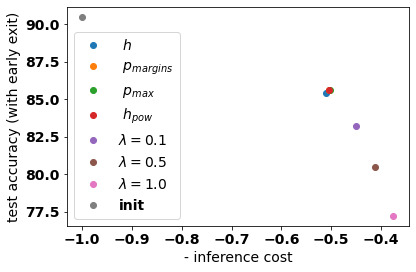

In [52]:
font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

for dict_of_result in hardcoded_results_list_dict:
    label = dict_of_result['label']
    cost = dict_of_result['cost']
    gated_acc = dict_of_result['gated_acc']
    plt.plot(-cost, gated_acc, 'o',label=label)
plt.xlabel('- inference cost')
plt.ylabel('test accuracy (with early exit)')
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('ic_vs_accuracy.pdf')

In [ ]:
plt.close()